# 1. load drive and install and load dependencies

In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pycaret

     |████████████████████████████████| 266 kB 14.8 MB/s 
     |████████████████████████████████| 261 kB 49.1 MB/s 
     |████████████████████████████████| 16.9 MB 77 kB/s 
     |████████████████████████████████| 167 kB 49.1 MB/s 
     |████████████████████████████████| 113 kB 54.1 MB/s 
     |████████████████████████████████| 1.3 MB 25.8 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 1.7 MB 37.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 38.2 MB/s 
     |████████████████████████████████| 6.8 MB 50.5 MB/s 
     |████████████████████████████████| 10.1 MB 55.0 MB/s 
     |████████████████████████████████| 3.1 MB 48.2 MB/s 
     |████████████████████████████████| 596 kB 61.3 MB/s 
     |█████████████████

In [3]:
pip install -U imbalanced-learn

     |████████████████████████████████| 189 kB 12.7 MB/s 
     |████████████████████████████████| 23.2 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.4 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.8.1 which is incompatible.
pycaret 2.3.4 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import train data

In [5]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_nonrandom_cellstate.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_nonrandom_cellstate.zip
  inflating: subsample_nonrandom_cellstate.csv  


In [6]:
df = pd.read_csv('subsample_nonrandom_cellstate.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.317720,-0.146983,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,-0.313821,-0.088790,-0.466089,-0.226714,-0.270607,-0.353075,0.574824,-0.335640,-0.314195,-0.323180,-0.090300,-0.250339,-0.391124,-0.246797,-0.189673,-0.616370,-0.316149,-0.356780,1.552249,-0.499215,-0.194878,-0.352990,-0.163568,-0.190939,-0.415853,-0.124281,-0.304426,-0.387812,-0.252874,-0.383583,0.478811,...,-0.376699,-0.175378,-0.423910,3.649650,0.573384,-0.158770,-0.188699,2.267675,-0.512170,-0.245922,3.651268,-0.132690,1.799477,-0.281949,-0.423601,-1.135320,-0.286250,-0.279708,1.809676,-0.224231,-0.168162,0.632239,0.123286,-0.175944,-0.220324,-0.176385,2.226596,-0.234638,-0.340674,0.107710,-0.300499,-0.697762,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell
GSM3148575_AAACCTGCACCCATGG,-0.062416,-0.195464,-0.065144,-0.042499,-0.135852,-0.351616,-0.248396,-0.270842,-0.268271,-0.325609,-0.101256,-0.445847,-0.054851,-0.181723,-0.380540,0.745766,-0.340088,-0.296601,-0.241316,-0.085254,-0.250838,-0.386196,-0.265224,-0.204572,1.161881,-0.348388,-0.398905,-0.398163,-0.419860,-0.160300,-0.324923,-0.167410,-0.184236,-0.413217,-0.116076,-0.267485,2.620898,-0.213646,-0.346287,0.473759,...,-0.379510,-0.161681,-0.407552,-0.199226,0.747376,-0.154697,-0.173045,-0.448623,-0.300369,-0.162582,-0.359982,-0.056778,-0.593834,-0.284930,-0.450226,-0.950650,-0.266962,-0.173080,-0.193029,-0.163202,-0.117656,-0.828857,0.615416,-0.188198,-0.232735,6.823150,-0.344204,-0.206602,-0.350901,-1.130293,-1.156253,-0.963172,-0.502495,-1.301666,-0.408829,-0.945157,-0.162975,-0.711097,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAGATGGGT,-0.082079,1.060037,-0.191346,-0.169694,-0.122829,2.005691,-0.276818,-0.259534,-0.277136,-0.297223,-0.101166,1.608985,-0.140124,-0.271896,-0.354905,0.266322,-0.353312,-0.320826,-0.314254,-0.094236,-0.274962,-0.415112,-0.245446,-0.184044,0.767068,-0.328530,-0.382333,-0.381429,-0.453147,-0.170926,-0.326742,-0.175238,-0.190458,-0.398930,-0.119770,-0.284986,-0.348206,-0.230224,-0.346436,0.211194,...,-0.373447,-0.165846,-0.392569,-0.233672,0.831479,-0.168126,3.846999,-0.479853,1.033201,-0.187547,-0.372761,-0.085260,1.248135,-0.266786,-0.417092,-1.064433,-0.307412,1.567685,-0.260816,2.432520,-0.142164,1.474821,0.259275,-0.174021,4.692780,-0.172141,-0.333820,-0.195588,-0.349128,0.346556,-0.558187,-0.403170,-0.261556,-1.011853,0.050656,-0.792443,0.404270,0.123457,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGGTAGCACGA,-0.096117,1.804662,-0.347806,

In [7]:
pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)

,count,percentage
T-cell,4537,0.505009
dendritic cell,982,0.109305
B-cell,790,0.087934
macrophage,712,0.079252
monocyte,500,0.055654
mast cell,250,0.027827
plasma cell,250,0.027827
granulocyte,250,0.027827
lymphocyte,250,0.027827
killer cell,250,0.027827


# 3. split data and oversample some classes

In [9]:
X = df.drop(columns=['cell_state', 'cell_type'])
y = df['cell_type']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. logistic regression

## without oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# lr = LogisticRegression(max_iter=10000) original 
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

#  The warning means what it mainly says: Suggestions to try to make the solver (the algorithm) converges.
# lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms provided by Scikit-Learn Library.
lr.fit(X_train, y_train) 



LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.90950174, 0.91719378, 0.91885002, 0.92772821, 0.93631907])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_12classes.sav'
joblib.dump(lr, filename)

['lr_model_12classes.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  92.54
F1 of logistic regression model :  92.25
F1 macro of logistic regression model :  82.07


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        B-cell       0.98      0.99      0.98       158
        T-cell       0.96      0.99      0.97       908
dendritic cell       0.90      0.91      0.90       197
   granulocyte       0.89      0.78      0.83        50
   killer cell       0.93      0.78      0.85        50
     leukocyte       0.96      0.74      0.84        31
    lymphocyte       0.87      0.68      0.76        50
    macrophage       0.80      0.77      0.78       142
     mast cell       0.98      0.98      0.98        50
      monocyte       0.80      0.86      0.83       100
  myeloid cell       0.25      0.09      0.13        11
   plasma cell       0.98      1.00      0.99        50

      accuracy                           0.93      1797
     macro avg       0.86      0.80      0.82      1797
  weighted avg       0.92      0.93      0.92      1797



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[156,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  2, 898,   0,   0,   2,   1,   5,   0,   0,   0,   0,   0],
       [  0,   1, 179,   3,   0,   0,   0,  10,   0,   4,   0,   0],
       [  0,   0,   5,  39,   0,   0,   0,   2,   0,   4,   0,   0],
       [  0,  11,   0,   0,  39,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,   0,   0,   0,  23,   0,   1,   1,   0,   0,   0],
       [  0,  15,   0,   0,   1,   0,  34,   0,   0,   0,   0,   0],
       [  1,   5,   9,   1,   0,   0,   0, 109,   0,  14,   3,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,  49,   0,   0,   0],
       [  0,   1,   4,   0,   0,   0,   0,   9,   0,  86,   0,   0],
       [  0,   0,   3,   1,   0,   0,   0,   6,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50]])

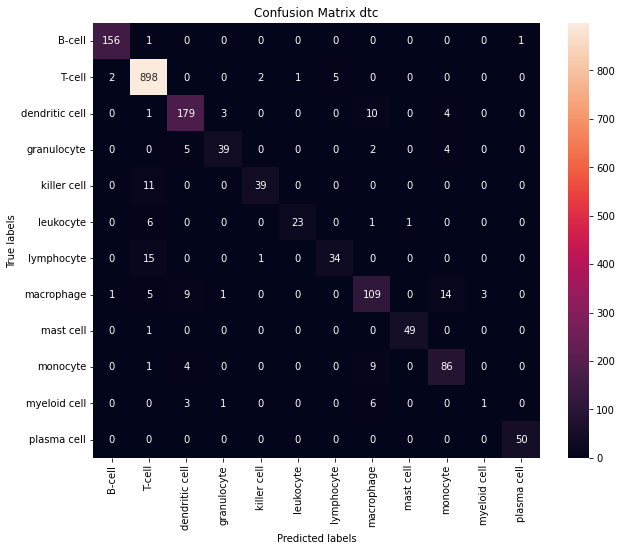

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc12Class20211027.png')
plt.show()

## oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

T-cell            3629
dendritic cell     785
B-cell             632
macrophage         570
monocyte           400
granulocyte        200
mast cell          200
plasma cell        200
killer cell        200
lymphocyte         200
leukocyte          126
myeloid cell        45
Name: cell_type, dtype: int64

In [ ]:
# Manipulated
oversampling_weights= {
    'T-cell': 3629,
    'B-cell': 632,
    'plasma cell': 200,
    'macrophage': 570,
    'killer cell':200,
    'monocyte': 400,
    'dendritic cell': 785,
    'lymphocyte': 200,
    'granulocyte': 200,
    'mast cell': 200,
    'leukocyte': 126,
    'myeloid cell': 100
}

In [ ]:
smtn = sampler = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

T-cell            3629
dendritic cell     785
B-cell             632
macrophage         570
monocyte           400
granulocyte        200
mast cell          200
plasma cell        200
killer cell        200
lymphocyte         200
leukocyte          126
myeloid cell        45
Name: cell_type, dtype: int64

In [ ]:
y_train_smote.value_counts()

T-cell            3629
dendritic cell     785
B-cell             632
macrophage         570
monocyte           400
granulocyte        200
mast cell          200
plasma cell        200
killer cell        200
lymphocyte         200
leukocyte          126
myeloid cell       100
Name: cell_type, dtype: int64

### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) 

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score  # 3.5 hours 
# Original 
#lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted', max_iter=10000)

# New one without max_iter=10000 because it gives an error message saying that max_iter should not be here 
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.9009199 , 0.90690204, 0.92549448, 0.93509285, 0.94390017])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_12classes_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_12classes_smote.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  92.6
F1 weighted of logistic regression model :  92.35
F1 macro of logistic regression model :  83.02


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                precision    recall  f1-score   support

        B-cell       0.98      0.99      0.98       158
        T-cell       0.96      0.99      0.97       908
dendritic cell       0.90      0.91      0.90       197
   granulocyte       0.89      0.78      0.83        50
   killer cell       0.93      0.78      0.85        50
     leukocyte       0.96      0.77      0.86        31
    lymphocyte       0.87      0.66      0.75        50
    macrophage       0.80      0.76      0.78       142
     mast cell       0.98      0.98      0.98        50
      monocyte       0.80      0.86      0.83       100
  myeloid cell       0.33      0.18      0.24        11
   plasma cell       0.98      1.00      0.99        50

      accuracy                           0.93      1797
     macro avg       0.86      0.81      0.83      1797
  weighted avg       0.92      0.93      0.92      1797



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[156,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  2, 898,   0,   0,   2,   1,   5,   0,   0,   0,   0,   0],
       [  0,   1, 180,   3,   0,   0,   0,  10,   0,   3,   0,   0],
       [  0,   0,   5,  39,   0,   0,   0,   2,   0,   4,   0,   0],
       [  0,  11,   0,   0,  39,   0,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,   0,   0,  24,   0,   1,   1,   0,   0,   0],
       [  0,  16,   0,   0,   1,   0,  33,   0,   0,   0,   0,   0],
       [  1,   5,   9,   1,   0,   0,   0, 108,   0,  14,   4,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,  49,   0,   0,   0],
       [  0,   1,   4,   0,   0,   0,   0,   9,   0,  86,   0,   0],
       [  0,   0,   3,   1,   0,   0,   0,   5,   0,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50]])

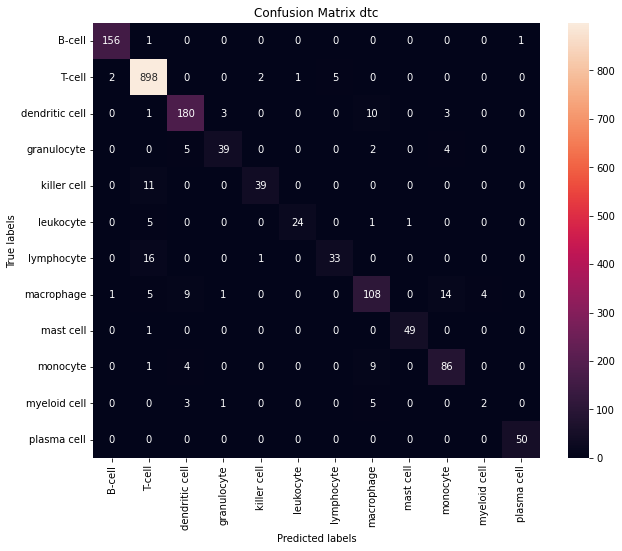

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_SMOTENdtc12Class20211027.png')
plt.show()

# 5. Predict Test Data (random 30% subset)

## import test data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [ ]:
df = pd.read_csv('subset_30.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,24926,0.765611
B-cell,2158,0.066284
macrophage,1823,0.055994
plasma cell,885,0.027183
killer cell,756,0.023221
monocyte,655,0.020119
dendritic cell,597,0.018337
lymphocyte,271,0.008324
granulocyte,243,0.007464
mast cell,147,0.004515


## split data

In [ ]:
X_test = df.drop(columns=['cell_state', 'cell_type'])
y_test = df['cell_type']

## predict data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [11]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/hierarchical/lr_model_12classes_smote.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  92.51
F1 weighted of logistic regression model :  92.24
F1 macro of logistic regression model :  63.25


In [ ]:
y_pred

array(['T-cell', 'T-cell', 'T-cell', ..., 'T-cell', 'T-cell', 'T-cell'],
      dtype=object)

In [ ]:
pd.DataFrame(y_pred).to_csv('prediction_12classes_balanced_subset30.csv', index=False)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        B-cell       0.97      0.98      0.97      2158
        T-cell       0.96      0.98      0.97     24926
dendritic cell       0.63      0.92      0.75       597
   granulocyte       0.27      0.56      0.37       243
   killer cell       0.75      0.25      0.38       756
     leukocyte       0.34      0.85      0.48        68
    lymphocyte       0.42      0.37      0.40       271
    macrophage       0.87      0.61      0.72      1823
     mast cell       0.98      0.96      0.97       147
      monocyte       0.62      0.68      0.65       655
  myeloid cell       0.00      0.00      0.00        28
   plasma cell       0.97      0.91      0.94       885

      accuracy                           0.93     32557
     macro avg       0.65      0.67      0.63     32557
  weighted avg       0.93      0.93      0.92     32557



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2109,    35,     3,     0,     0,    10,     0,     0,     0,
            0,     0,     1],
       [   39, 24478,    18,    10,    64,    91,   137,    58,     1,
            5,     9,    16],
       [    1,     3,   549,     8,     0,     1,     0,    25,     0,
            8,     2,     0],
       [    0,     1,    19,   136,     0,     0,     0,    15,     1,
           69,     2,     0],
       [    2,   534,    16,     0,   191,     5,     1,     2,     0,
            5,     0,     0],
       [    0,     7,     1,     0,     0,    58,     0,     1,     0,
            1,     0,     0],
       [    0,   170,     0,     0,     0,     0,   101,     0,     0,
            0,     0,     0],
       [    1,    79,   253,   182,     0,     4,     0,  1105,     1,
          181,    13,     4],
       [    0,     3,     0,     0,     0,     0,     0,     1,   141,
            1,     0,     1],
       [    0,     2,    11,   160,     0,     0,     0,    37,     0,
          445,     0

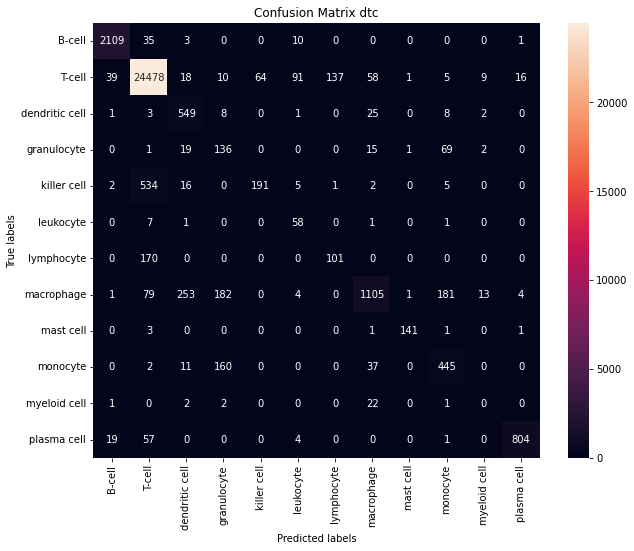

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_test)); ax.yaxis.set_ticklabels(np.unique(y_test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()